In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [47]:
df=pd.read_csv("air-traffic-passenger-statistics (1).csv")

In [48]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [49]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
16084,201611,Virgin America,VX,Virgin America,VX,Domestic,US,Deplaned,Low Fare,Terminal 2,D,201263
9424,201204,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,33706
2825,200707,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Other,International,G,18998
1689,200609,US Airways,US,US Airways,US,Domestic,US,Enplaned,Other,Terminal 1,B,38447
3282,200711,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,3027


In [50]:
df.shape

(18885, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [52]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [53]:
df["Operating Airline IATA Code"].value_counts()

UA    3807
OO    1212
AS     891
VX     462
DL     445
      ... 
IB       6
WO       3
XP       2
5Y       2
EZ       2
Name: Operating Airline IATA Code, Length: 82, dtype: int64

In [54]:
df["Operating Airline IATA Code"]=df["Operating Airline IATA Code"].fillna("UA")

In [55]:
df["Published Airline IATA Code"].value_counts()

UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
BBB       6
WO        3
EZ        2
XP        2
5Y        2
Name: Published Airline IATA Code, Length: 73, dtype: int64

In [56]:
df["Published Airline IATA Code"]=df["Published Airline IATA Code"].fillna("UA")

In [82]:
df["Price Category Code"].value_counts()

Other       16521
Low Fare     2364
Name: Price Category Code, dtype: int64

In [84]:
from sklearn.cluster import KMeans #en yaakın komşu demek, clustering denetimsiz öğreitme giriyor, burfda hedef yok
from sklearn.metrics import silhouette_score


In [108]:
x=df[["Activity Period","Passenger Count"]]

In [109]:
x=pd.get_dummies(x,drop_first=True)

In [110]:
x.head()

,Activity Period,Passenger Count
0,200507,27271
1,200507,29131
2,200507,5415
3,200507,35156
4,200507,34090


In [137]:
model=KMeans(n_clusters=15)

In [138]:
model=model.fit(x)

In [139]:
tahmin=model.predict(x)

In [140]:
tahmin


array([7, 7, 9, ..., 0, 9, 9])

In [141]:
x["cluster"]=tahmin 

In [142]:
x.head()

,Activity Period,Passenger Count,cluster
0,200507,27271,7
1,200507,29131,7
2,200507,5415,9
3,200507,35156,7
4,200507,34090,7


In [146]:
silhouette_score(x,tahmin)# yüksek gelmez sadce fikir verir

0.5207696673641748

In [127]:
import matplotlib.pyplot as plt

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(x.Activity Period,x.Passenger Count,c=tahmin)
plt.xlabel("Aktivite Periodu")
plt.ylabel("Yolcu Sayısı")
plt.colorbar()
plt.grid()

SyntaxError: invalid syntax (1869271244.py, line 2)

In [148]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)#score ve uzaklığı eklememmeiz gerek
        uzaklik=model.inertia_
        print("Cluster",i,"score",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(15)

Cluster 2 score 0.8594457138673857
Cluster 3 score 0.8282308994909744
Cluster 4 score 0.7852108959303349
Cluster 5 score 0.7837145997415371
Cluster 6 score 0.655645491116903
Cluster 7 score 0.6623871911116691
Cluster 8 score 0.64462689036459
Cluster 9 score 0.6376763020505929
Cluster 10 score 0.6079760727065548
Cluster 11 score 0.6053918633719504
Cluster 12 score 0.6056450566273498
Cluster 13 score 0.520691601246453
Cluster 14 score 0.5200812303992306
Cluster 15 score 0.5217082138282817
Cluster 16 score 0.5254184730247154


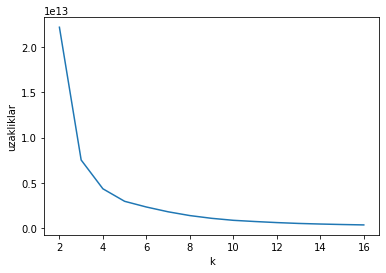

In [149]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar)